Load Related Packages

In [1]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install -U peft transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 648.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 572.8 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 2.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 37.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.3
    Uninstalling transformers-4.42.3:
      Successfully uninstalled transformers-4.42.3


Loading Models

In [2]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")
generator = torch.Generator("cuda").manual_seed(1024)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

2024-08-12 18:03:10.508374: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-12 18:03:10.508481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 18:03:10.692764: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Use original model to generate image

In [3]:
import os
prompts = [
    "(((sitting, crossed legs))), ((Jeanne d'Arc Alter (Fate))), ((maid, maid apron, maid headdress)), best quality, looking at viewer, 1 girl, blonde hair, yellow eyes, high resolution, detailed, intricate, green background, close-up, open clothes, (beautiful face:1.15), anime style, soft lighting, indoor setting, Victorian window, (intricate details), (high quality), (illustration:1.1)",
    "anime screencap, masterpiece, best quality, 1girl, aqua eyes, baseball cap, blonde hair, closed mouth, earrings, green background, hat, hoop earrings, jewelry, looking at viewer, shirt, short hair, simple background, solo, upper body, yellow shirt",
    "solo,multicolored hair,one-hour drawing challenge,shirt,tears,hand up,thighs,cropped legs,kindergarten uniform,red eyes,blue skirt,between legs,dress shirt,kantai collection,ebifurya,looking at viewer,collared shirt,very long hair,matsuwa (kancolle),skirt,gradient hair,simple background,1girl,purple hair,sitting,white background,pleated skirt,long hair,blue shirt,name tag,white headwear,parted bangs,hand between legs,black hair,highres,blush",
    "1girl, solo, smile, indoors, blue eyes, side ponytail, classroom, black hair, breasts, sweater, looking at viewer, desk, sleeveless sweater, school desk, ribbed sweater, grin, sleeveless turtleneck, turtleneck, bare shoulders, blush, long hair, chalkboard, chair, turtleneck sweater, bangs, medium breasts, bare arms, upper body, sitting, school chair, green background",
    "mayuzumi fuyuko, 1 girl, arm support, bed sheet, black hair, black ribbon, black skirt, black thighhighs, blush, large breasts, long hair, long sleeves, looking at viewer, neck ribbon, pink shirt, ribbon, frilled shirt, sitting, skirt, smile, solo, suspender skirt, suspenders, white background, cinematic angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality"
]

negative_prompts = [
    "bad-artist-anime, bad-hands-5, bad-image-v2-39000, bad_prompt_version2, bad_quality, bad-image-9600, badtth115, negprompt5, NG_DeepNegative_V1_75T, rtfclprmt315, Unspeakable-Horrors-Composition-4v,((worst quality)), low quality, (((out of frame))), (((out of borders))), ((close up)),  ((disfigured)), ((bad art)), blurry foreground, (blurry:2.0), jpeg artifacts, signature, watermark, username, blurry, artist name,  text, JPEG artifacts, signature,watermark, extra digit, fewer digits, text, error, patreon username, text font ui,  (censored), mosaic censoring, bar censor, pointless censoring, horror, cropped, (((deformed))), ((extra limbs)), (((duplicate))), ((morbid)), ((mutilated)), ((poorly drawn hands)), ((poorly drawn face)), (((mutation))), ((ugly)),  ((bad anatomy)), (((bad proportions))), weird colors, gross proportions, (malformed limbs), ((missing arms)), ((missing legs)), (((extra arms))), (((extra legs))), mutated hands, (fused fingers), (too many fingers), (((long neck))), ((extra fingers)), missing fingers, ((mangled fingers)), glitchy,  (((((fused fingers))))), (((((too many fingers))))), (((unclear eyes))), (lowres), bad anatomy, cloned face, malformed hands, long neck, missing limb,  poorly drawn feet, disfigured, (mutated hand and finger: 1.5), (long body: 1.3), (mutation poorly drawn: 1.2), fused asshole, missing asshole, bad anus, bad pussy, bad crotch, bad crotch seam, fused anus, fused pussy, (more than 2 nipples), missing clit, bad clit, fused clit, worst face, Ugly Fingers, [thick lips], huge eyes,  multiple breasts, ((plump)),yaoi, furry, pubic hair, mosaic, (multiple moles),  ((pubic tattoo)), (deformed fingers:1.2), (long fingers:1.2), (interlocked fingers:1.2), forehead mark, facial mark, ((monochrome)),",
    "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry",
    "blurry, blur, watermark, logo, text, signature, nudity, nsfw, hands,",
    "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]",
    "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]"
]

os.makedirs("/kaggle/working/orginal", exist_ok=True)


for i in range(len(prompts)):
    generator = torch.Generator("cuda").manual_seed(1024)
    image = pipeline(prompt=prompts[i], negative_prompt=negative_prompts[i], guidance_scale=7.5, generator=generator).images[0]
    output_file = os.path.join("/kaggle/working/orginal", f"cartoon_{i + 1}.png")
    image.save(output_file)


Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']
Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']


  0%|          | 0/50 [00:00<?, ?it/s]

In [4]:
from PIL import Image
import os

# Set the directory for the images
output_dir = "/kaggle/working/orginal"

# Get all generated images
image_files = [os.path.join(output_dir, f"cartoon_{i + 1}.png") for i in range(len(prompts))]

# Open all images
images = [Image.open(img_file) for img_file in image_files]

# Get the size of each image
img_width, img_height = images[0].size

# Calculate the number of rows and columns for the image grid
num_images = len(images)
grid_size = int(num_images**0.5) + 1  # Calculate the grid size

# Create a new blank image to combine the images
combined_img_width = grid_size * img_width
combined_img_height = grid_size * img_height
combined_image = Image.new('RGB', (combined_img_width, combined_img_height))

# Paste each image onto the combined image
for index, image in enumerate(images):
    row = index // grid_size
    col = index % grid_size
    x = col * img_width
    y = row * img_height
    combined_image.paste(image, (x, y))

# Save the combined image
combined_image.save(os.path.join(output_dir, "combined_image.png"))

print("All images combined and saved as 'combined_image.png'.")


All images combined and saved as 'combined_image.png'.


Generating images using the fine-tuned model

In [5]:
from diffusers import AutoPipelineForText2Image
import torch
import os

prompts = [
    "(((sitting, crossed legs))), ((Jeanne d'Arc Alter (Fate))), ((maid, maid apron, maid headdress)), best quality, looking at viewer, 1 girl, blonde hair, yellow eyes, high resolution, detailed, intricate, green background, close-up, open clothes, (beautiful face:1.15), anime style, soft lighting, indoor setting, Victorian window, (intricate details), (high quality), (illustration:1.1)",
    "anime screencap, masterpiece, best quality, 1girl, aqua eyes, baseball cap, blonde hair, closed mouth, earrings, green background, hat, hoop earrings, jewelry, looking at viewer, shirt, short hair, simple background, solo, upper body, yellow shirt",
    "solo,multicolored hair,one-hour drawing challenge,shirt,tears,hand up,thighs,cropped legs,kindergarten uniform,red eyes,blue skirt,between legs,dress shirt,kantai collection,ebifurya,looking at viewer,collared shirt,very long hair,matsuwa (kancolle),skirt,gradient hair,simple background,1girl,purple hair,sitting,white background,pleated skirt,long hair,blue shirt,name tag,white headwear,parted bangs,hand between legs,black hair,highres,blush",
    "1girl, solo, smile, indoors, blue eyes, side ponytail, classroom, black hair, breasts, sweater, looking at viewer, desk, sleeveless sweater, school desk, ribbed sweater, grin, sleeveless turtleneck, turtleneck, bare shoulders, blush, long hair, chalkboard, chair, turtleneck sweater, bangs, medium breasts, bare arms, upper body, sitting, school chair, green background",
    "mayuzumi fuyuko, 1 girl, arm support, bed sheet, black hair, black ribbon, black skirt, black thighhighs, blush, large breasts, long hair, long sleeves, looking at viewer, neck ribbon, pink shirt, ribbon, frilled shirt, sitting, skirt, smile, solo, suspender skirt, suspenders, white background, cinematic angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality"
]

negative_prompts = [
    "bad-artist-anime, bad-hands-5, bad-image-v2-39000, bad_prompt_version2, bad_quality, bad-image-9600, badtth115, negprompt5, NG_DeepNegative_V1_75T, rtfclprmt315, Unspeakable-Horrors-Composition-4v,((worst quality)), low quality, (((out of frame))), (((out of borders))), ((close up)),  ((disfigured)), ((bad art)), blurry foreground, (blurry:2.0), jpeg artifacts, signature, watermark, username, blurry, artist name,  text, JPEG artifacts, signature,watermark, extra digit, fewer digits, text, error, patreon username, text font ui,  (censored), mosaic censoring, bar censor, pointless censoring, horror, cropped, (((deformed))), ((extra limbs)), (((duplicate))), ((morbid)), ((mutilated)), ((poorly drawn hands)), ((poorly drawn face)), (((mutation))), ((ugly)),  ((bad anatomy)), (((bad proportions))), weird colors, gross proportions, (malformed limbs), ((missing arms)), ((missing legs)), (((extra arms))), (((extra legs))), mutated hands, (fused fingers), (too many fingers), (((long neck))), ((extra fingers)), missing fingers, ((mangled fingers)), glitchy,  (((((fused fingers))))), (((((too many fingers))))), (((unclear eyes))), (lowres), bad anatomy, cloned face, malformed hands, long neck, missing limb,  poorly drawn feet, disfigured, (mutated hand and finger: 1.5), (long body: 1.3), (mutation poorly drawn: 1.2), fused asshole, missing asshole, bad anus, bad pussy, bad crotch, bad crotch seam, fused anus, fused pussy, (more than 2 nipples), missing clit, bad clit, fused clit, worst face, Ugly Fingers, [thick lips], huge eyes,  multiple breasts, ((plump)),yaoi, furry, pubic hair, mosaic, (multiple moles),  ((pubic tattoo)), (deformed fingers:1.2), (long fingers:1.2), (interlocked fingers:1.2), forehead mark, facial mark, ((monochrome)),",
    "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry",
    "blurry, blur, watermark, logo, text, signature, nudity, nsfw, hands,",
    "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]",
    "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]"
]

base_dir = "/kaggle/input/fine-tune-lora-sd-xl/fine-tune-lora/checkpoint-1000"
output_base_dir = "/kaggle/working/"
end_output_dir = "/kaggle/working/output_file_checkpoint-1000"

os.makedirs(end_output_dir, exist_ok=True)

try:
    pipeline.load_lora_weights(base_dir, weight_name="pytorch_lora_weights.safetensors")
except HFValidationError as e:
    print(f"Error loading pipeline or weights: {e}")
    raise

for i, (prompt, n_prompt) in enumerate(zip(prompts, negative_prompts)):
    output_file = os.path.join(end_output_dir, f"cartoon_{i + 1}.png")
    if not os.path.exists(output_file):
        try:
            print(f"Generating image for prompt {i + 1}")
            image = pipeline(prompt=prompt, negative_prompt=n_prompt, guidance_scale=7.5, generator=generator).images[0]
            image.save(output_file)
        except Exception as e:
            print(f"Error generating image for prompt {i + 1}: {e}")
    else:
        print(f"Image for prompt {i + 1} already exists, skipping.")

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']


Generating image for prompt 1


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 2


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']


Generating image for prompt 3


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']


Generating image for prompt 4


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']


Generating image for prompt 5


  0%|          | 0/50 [00:00<?, ?it/s]

In [6]:
from PIL import Image
import os

# Set the directory for the images
output_dir = "/kaggle/working/output_file_checkpoint-1000"

# Get all generated images
image_files = [os.path.join(output_dir, f"cartoon_{i + 1}.png") for i in range(len(prompts))]

# Open all images
images = [Image.open(img_file) for img_file in image_files]

# Get the size of each image
img_width, img_height = images[0].size

# Calculate the number of rows and columns for the image grid
num_images = len(images)
grid_size = int(num_images**0.5) + 1  # Calculate the grid size

# Create a new blank image to combine the images
combined_img_width = grid_size * img_width
combined_img_height = grid_size * img_height
combined_image = Image.new('RGB', (combined_img_width, combined_img_height))

# Paste each image onto the combined image
for index, image in enumerate(images):
    row = index // grid_size
    col = index % grid_size
    x = col * img_width
    y = row * img_height
    combined_image.paste(image, (x, y))

# Save the combined image
combined_image.save(os.path.join(output_dir, "combined_image.png"))

print("All images combined and saved as 'combined_image.png'.")


All images combined and saved as 'combined_image.png'.


Generate an image using all the weights after fine-tuning

In [9]:
from diffusers import AutoPipelineForText2Image
import torch
import os

prompts = [
    "(((sitting, crossed legs))), ((Jeanne d'Arc Alter (Fate))), ((maid, maid apron, maid headdress)), best quality, looking at viewer, 1 girl, blonde hair, yellow eyes, high resolution, detailed, intricate, green background, close-up, open clothes, (beautiful face:1.15), anime style, soft lighting, indoor setting, Victorian window, (intricate details), (high quality), (illustration:1.1)",
    "anime screencap, masterpiece, best quality, 1girl, aqua eyes, baseball cap, blonde hair, closed mouth, earrings, green background, hat, hoop earrings, jewelry, looking at viewer, shirt, short hair, simple background, solo, upper body, yellow shirt",
    "solo,multicolored hair,one-hour drawing challenge,shirt,tears,hand up,thighs,cropped legs,kindergarten uniform,red eyes,blue skirt,between legs,dress shirt,kantai collection,ebifurya,looking at viewer,collared shirt,very long hair,matsuwa (kancolle),skirt,gradient hair,simple background,1girl,purple hair,sitting,white background,pleated skirt,long hair,blue shirt,name tag,white headwear,parted bangs,hand between legs,black hair,highres,blush",
    "1girl, solo, smile, indoors, blue eyes, side ponytail, classroom, black hair, breasts, sweater, looking at viewer, desk, sleeveless sweater, school desk, ribbed sweater, grin, sleeveless turtleneck, turtleneck, bare shoulders, blush, long hair, chalkboard, chair, turtleneck sweater, bangs, medium breasts, bare arms, upper body, sitting, school chair, green background",
    "mayuzumi fuyuko, 1 girl, arm support, bed sheet, black hair, black ribbon, black skirt, black thighhighs, blush, large breasts, long hair, long sleeves, looking at viewer, neck ribbon, pink shirt, ribbon, frilled shirt, sitting, skirt, smile, solo, suspender skirt, suspenders, white background, cinematic angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality"
]

negative_prompts = [
    "bad-artist-anime, bad-hands-5, bad-image-v2-39000, bad_prompt_version2, bad_quality, bad-image-9600, badtth115, negprompt5, NG_DeepNegative_V1_75T, rtfclprmt315, Unspeakable-Horrors-Composition-4v,((worst quality)), low quality, (((out of frame))), (((out of borders))), ((close up)),  ((disfigured)), ((bad art)), blurry foreground, (blurry:2.0), jpeg artifacts, signature, watermark, username, blurry, artist name,  text, JPEG artifacts, signature,watermark, extra digit, fewer digits, text, error, patreon username, text font ui,  (censored), mosaic censoring, bar censor, pointless censoring, horror, cropped, (((deformed))), ((extra limbs)), (((duplicate))), ((morbid)), ((mutilated)), ((poorly drawn hands)), ((poorly drawn face)), (((mutation))), ((ugly)),  ((bad anatomy)), (((bad proportions))), weird colors, gross proportions, (malformed limbs), ((missing arms)), ((missing legs)), (((extra arms))), (((extra legs))), mutated hands, (fused fingers), (too many fingers), (((long neck))), ((extra fingers)), missing fingers, ((mangled fingers)), glitchy,  (((((fused fingers))))), (((((too many fingers))))), (((unclear eyes))), (lowres), bad anatomy, cloned face, malformed hands, long neck, missing limb,  poorly drawn feet, disfigured, (mutated hand and finger: 1.5), (long body: 1.3), (mutation poorly drawn: 1.2), fused asshole, missing asshole, bad anus, bad pussy, bad crotch, bad crotch seam, fused anus, fused pussy, (more than 2 nipples), missing clit, bad clit, fused clit, worst face, Ugly Fingers, [thick lips], huge eyes,  multiple breasts, ((plump)),yaoi, furry, pubic hair, mosaic, (multiple moles),  ((pubic tattoo)), (deformed fingers:1.2), (long fingers:1.2), (interlocked fingers:1.2), forehead mark, facial mark, ((monochrome)),",
    "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry",
    "blurry, blur, watermark, logo, text, signature, nudity, nsfw, hands,",
    "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]",
    "nsfw, lowres, (bad), text, error, fewer, extra, missing, worst quality, jpeg artifacts, low quality, watermark, unfinished, displeasing, oldest, early, chromatic aberration, signature, extra digits, artistic error, username, scan, [abstract]"
]

base_dir = "/kaggle/input/fine-tune-lora-sd-xl/fine-tune-lora"
output_base_dir = "/kaggle/working/"
end_output_dir = "/kaggle/working/output_file_checkpoint-10000000"

os.makedirs(end_output_dir, exist_ok=True)

try:
    pipeline = AutoPipelineForText2Image.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",
                                                         torch_dtype=torch.float16).to("cuda")
    pipeline.load_lora_weights(base_dir, weight_name="pytorch_lora_weights.safetensors")
except HFValidationError as e:
    print(f"Error loading pipeline or weights: {e}")
    raise

for i, (prompt, n_prompt) in enumerate(zip(prompts, negative_prompts)):
    output_file = os.path.join(end_output_dir, f"cartoon_{i + 1}.png")
    if not os.path.exists(output_file):
        try:
            print(f"Generating image for prompt {i + 1}")
            image = pipeline(prompt=prompt, negative_prompt=n_prompt, guidance_scale=7.5, generator=generator).images[0]
            image.save(output_file)
        except Exception as e:
            print(f"Error generating image for prompt {i + 1}: {e}")
    else:
        print(f"Image for prompt {i + 1} already exists, skipping.")

checkpoints = [f for f in os.listdir(base_dir)
               if os.path.isdir(os.path.join(base_dir, f)) and f.startswith('checkpoint')]
checkpoints = sorted(checkpoints, key=lambda x: int(x.split('-')[1]))

# delete sort element
checkpoints = [checkpoints[i] for i in range(len(checkpoints)) if i % 10 == 0]
print(checkpoints)

for checkpoint in checkpoints:
    checkpoint_path = os.path.join(base_dir, checkpoint)
    output_dir = os.path.join(output_base_dir, f"output_file_{checkpoint}")

    os.makedirs(output_dir, exist_ok=True)

    try:
        print(f"Processing checkpoint: {checkpoint}")
        pipeline = AutoPipelineForText2Image.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0",
                                                             torch_dtype=torch.float16).to("cuda")
        pipeline.load_lora_weights(checkpoint_path, weight_name="pytorch_lora_weights.safetensors")
    except HFValidationError as e:
        print(f"Error loading pipeline or weights for checkpoint {checkpoint}: {e}")
        continue

    for i, (prompt, n_prompt) in enumerate(zip(prompts, negative_prompts)):
        output_file = os.path.join(output_dir, f"cartoon_{i + 1}.png")
        if not os.path.exists(output_file):
            try:
                print(f"Generating image for prompt {i + 1} using checkpoint {checkpoint}")
                image = pipeline(prompt=prompt, negative_prompt=n_prompt, guidance_scale=7.5, generator=generator).images[0]
                image.save(output_file)
            except Exception as e:
                print(f"Error generating image for prompt {i + 1} using checkpoint {checkpoint}: {e}")
        else:
            print(f"Image for prompt {i + 1} using checkpoint {checkpoint} already exists, skipping.")

print("All images generated and saved.")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Image for prompt 1 already exists, skipping.
Image for prompt 2 already exists, skipping.
Image for prompt 3 already exists, skipping.
Image for prompt 4 already exists, skipping.
Image for prompt 5 already exists, skipping.
['checkpoint-200', 'checkpoint-2200', 'checkpoint-4200', 'checkpoint-6200', 'checkpoint-8200', 'checkpoint-10200', 'checkpoint-12200', 'checkpoint-14200']
Processing checkpoint: checkpoint-200


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']
Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']


Generating image for prompt 1 using checkpoint checkpoint-200


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 2 using checkpoint checkpoint-200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']


Generating image for prompt 3 using checkpoint checkpoint-200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']


Generating image for prompt 4 using checkpoint checkpoint-200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']


Generating image for prompt 5 using checkpoint checkpoint-200


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-2200


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']
Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']


Generating image for prompt 1 using checkpoint checkpoint-2200


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 2 using checkpoint checkpoint-2200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']


Generating image for prompt 3 using checkpoint checkpoint-2200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']


Generating image for prompt 4 using checkpoint checkpoint-2200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']


Generating image for prompt 5 using checkpoint checkpoint-2200


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-4200


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']
Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']


Generating image for prompt 1 using checkpoint checkpoint-4200


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 2 using checkpoint checkpoint-4200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']


Generating image for prompt 3 using checkpoint checkpoint-4200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']


Generating image for prompt 4 using checkpoint checkpoint-4200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']


Generating image for prompt 5 using checkpoint checkpoint-4200


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-6200


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']
Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']


Generating image for prompt 1 using checkpoint checkpoint-6200


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 2 using checkpoint checkpoint-6200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']


Generating image for prompt 3 using checkpoint checkpoint-6200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']


Generating image for prompt 4 using checkpoint checkpoint-6200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']


Generating image for prompt 5 using checkpoint checkpoint-6200


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-8200


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']
Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']


Generating image for prompt 1 using checkpoint checkpoint-8200


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 2 using checkpoint checkpoint-8200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']


Generating image for prompt 3 using checkpoint checkpoint-8200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']


Generating image for prompt 4 using checkpoint checkpoint-8200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']


Generating image for prompt 5 using checkpoint checkpoint-8200


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-10200


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']
Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']


Generating image for prompt 1 using checkpoint checkpoint-10200


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 2 using checkpoint checkpoint-10200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']


Generating image for prompt 3 using checkpoint checkpoint-10200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']


Generating image for prompt 4 using checkpoint checkpoint-10200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']


Generating image for prompt 5 using checkpoint checkpoint-10200


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-12200


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']
Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']


Generating image for prompt 1 using checkpoint checkpoint-12200


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 2 using checkpoint checkpoint-12200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']


Generating image for prompt 3 using checkpoint checkpoint-12200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']


Generating image for prompt 4 using checkpoint checkpoint-12200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']


Generating image for prompt 5 using checkpoint checkpoint-12200


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-14200


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']
Token indices sequence length is longer than the specified maximum sequence length for this model (99 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', indoor setting, victorian window, ( intricate details ), ( high quality ), ( illustration : 1. 1 )']


Generating image for prompt 1 using checkpoint checkpoint-14200


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 2 using checkpoint checkpoint-14200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 1 girl, purple hair, sitting, white background, pleated skirt, long hair, blue shirt, name tag, white headwear, parted bangs, hand between legs, black hair, highres, blush']


Generating image for prompt 3 using checkpoint checkpoint-14200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['arms, upper body, sitting, school chair, green background']


Generating image for prompt 4 using checkpoint checkpoint-14200


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['angle, cinematic lighting, anime coloring, detailed, masterpiece, best quality']


Generating image for prompt 5 using checkpoint checkpoint-14200


  0%|          | 0/50 [00:00<?, ?it/s]

All images generated and saved.


Generate comparisons of all images

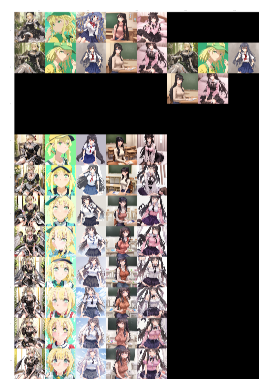

In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import re  # Import regex for pattern matching

def merge_images_horizontally(images):
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    new_image = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for img in images:
        new_image.paste(img, (x_offset, 0))
        x_offset += img.width
    return new_image

def merge_images_vertically(images):
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    total_height = sum(heights)

    new_image = Image.new('RGB', (max_width, total_height))
    y_offset = 0
    for img in images:
        new_image.paste(img, (0, y_offset))
        y_offset += img.height
    return new_image

def add_labels(image, x_labels, y_labels, label_width=150, label_height=100, font_size=30):
    img_with_labels = Image.new('RGB', (image.width + label_width, image.height + label_height), (255, 255, 255))
    img_with_labels.paste(image, (label_width, label_height))

    draw = ImageDraw.Draw(img_with_labels)

    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    x_label_width = image.width // len(x_labels)
    for i, label in enumerate(x_labels):
        bbox = draw.textbbox((0, 0), label, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        x_position = label_width + (i * x_label_width) + (x_label_width - text_width) // 2
        y_position = label_height // 2 - text_height // 2
        draw.text((x_position, y_position), label, fill="black", font=font)

    y_label_height = image.height // len(y_labels)
    for i, label in enumerate(y_labels):
        bbox = draw.textbbox((0, 0), label, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        x_position = 10
        y_position = label_height + (i * y_label_height) + (y_label_height - text_height) // 2
        draw.text((x_position, y_position), label, fill="black", font=font)

    return img_with_labels

def main(input_folder, output_file):
    subfolders = [f.path for f in os.scandir(input_folder) if f.is_dir()]

    subfolders = [folder for folder in subfolders if re.search(r'-\d+$', os.path.basename(folder))]

    subfolders.sort(key=lambda folder: int(re.search(r'-\d+$', os.path.basename(folder)).group()[1:]))

    combined_images = []
    x_labels = []  
    y_labels = []  

    for folder in subfolders:
        images = []
        files = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
        x_labels = [f for f in files]  

        for file in files:
            img_path = os.path.join(folder, file)
            img = Image.open(img_path)
            images.append(img)

        combined_img = merge_images_horizontally(images)
        combined_images.append(combined_img)


    y_labels = [os.path.basename(folder).replace('output_file_checkpoint-', '') for folder in subfolders]

    final_image = merge_images_vertically(combined_images)

    final_image_with_labels = add_labels(final_image, x_labels, y_labels, label_width=150, label_height=100, font_size=30)

    final_image_with_labels.save(output_file)

input_folder = '/kaggle/working'
output_file = '/kaggle/working/final_combined_image_with_labels.png'
main(input_folder, output_file)

img = Image.open(output_file)
plt.imshow(img)
plt.axis('off')
plt.show()
img